In [58]:
#I plot data from Shen and Bentz
import ROOT
from ROOT import *
from array import array
import math
from IPython.display import Image
from IPython.display import display
import numpy as np
import astropy
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import LambdaCDM
import scipy
import matplotlib
import matplotlib.pyplot as plt

olderrors = 1 #Naive if 1

# Setting what to be shown in statistics box:
gStyle.SetOptStat(1110)   # Print for stat: Entries, Mean, and RMS
gStyle.SetOptFit(1111)    # Print for fit:  Everything!

r = TRandom3()

#---------------------------------------------------------------------------------
### Constants ###
        
c         = 299792458. #m/s
H0        = 2.23 *10.**(-18) # s^-1      = 69 (km/s)/Mpc
dH0       = 0.03 *10.**(-18) # s^-1      = 1 (km/s)/Mpc
L_sol     = 3.828*10**(26) # W

print "done"

done


In [59]:
#----------------------------------------------------------------------
# Read data
#----------------------------------------------------------------------
### Bentz 13 part I ###
#name    z    D_L   dD   A_B

#f_lambda(5100*(1+z))

name_B          =[]
z_B             = array("f", [])
D_B             = array("f", [])
dD_B            = array("f", [])
A_B_B           = array("f", [])

with open( 'Bentz13zDA.txt', 'r' ) as infile :
    for line in infile:
        line = line.strip().split()
        
        name_B.append((line[0]))
        
        z_B.append(float(line[1]))
        
        D_B.append(float(line[2])*3.0857*10**22) #Mpc -> m
        dD_B.append(float(line[3])*3.0857*10**22)
        
        A_B_B.append(float(line[4]))
#---------------------------------------------------------------------------------
### Bentz 13 part II ###
#name/a    tau  +dtau   -dtau    F  dF    L   dL
# a=same name

#f_lambda(5100*(1+z))

#10^44 ergs s^-1

name_B2      = []
tau_B2       = array("f", [])
dtaup_B2     = array("f", [])
dtaum_B2     = array("f", [])
F_B2         = array("f", [])
dF_B2        = array("f", [])
L_B2         = array("f", [])
dL_B2        = array("f", [])

with open( 'Bentz13tauFL.txt', 'r' ) as infile :
#with open( 'Bentz13tauFL_newer.txt', 'r' ) as infile :
    for line in infile:
        line = line.strip().split()
        
        name_B2.append((line[0]))
        
        tau_B2.append(float(line[1])*24*60*60) #days -> s
        dtaup_B2.append(float(line[2])*24*60*60)
        dtaum_B2.append(float(line[3])*24*60*60)
        
        F_B2.append(float(line[4])*10**(-8)) #10^-15 ergs s^-1 cm^-2 AA^-1 = 10^-15 *10^7 kg s^-3 m^-1
        dF_B2.append(float(line[5])*10**(-8))
        
        #Should be wrong - this is from the article
        #L_B2.append(float(line[6])*10**(37)/L_sol) #10^44 ergs s^-1 ->  10^44 * 10^-7 kg m^2 s^-3       
        #dL_B2.append(float(line[7])*10**(37)/L_sol)
        
        #Right way:
        #L_B2.append((10**(float(line[6])))*10**(-7)/L_sol) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        #dL_B2.append((10**(float(line[7])))*10**(-7)/L_sol)
        
        #log:
        L_B2.append(float(line[6])) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        dL_B2.append(float(line[7]))
#---------------------------------------------------------------------------------
### Shen ###
#name    z    tau    dtau+    dtau-   F    dF    L    dL
# a=same name

#f_lambda(5100*(1+z))


name_S    = []
z_S       = array("f", [])
tau_S     = array("f", [])
dtaup_S   = array("f", [])
dtaum_S   = array("f", [])
F_S       = array("f", [])
dF_S      = array("f", [])
L_S       = array("f", [])
dL_S      = array("f", [])

with open( 'ShenSDSSztauFL.txt', 'r' ) as infile :
#with open( 'ShenSDSSztauFL_with_priors_newer.txt', 'r' ) as infile :
    for line in infile:
        line = line.strip().split()
        
        name_S.append((line[0]))
        
        z_S.append(float(line[1]))
        
        tau_S.append(float(line[2])*24*60*60)  #days -> s
        dtaup_S.append(float(line[3])*24*60*60) 
        dtaum_S.append(float(line[4])*24*60*60) 
        
        F_S.append(float(line[5])*10**(-10)) #10^-17 erg s^-1 cm^-2 AA^-1 =10^-17 *10^7 kg s^-3 m^-1 -> kg s^-3 m^-1
        dF_S.append(float(line[6])*10**(-10))
        
        #print float(line[7])
        
        #L_S.append(math.exp(float(line[7]))*10**(-7)/L_sol) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=10^y
        #dL_S.append(math.exp(float(line[8]))*10**(-7)/L_sol)
        
        #Right way:
        #L_S.append((10**(float(line[7])))*10**(-7)/L_sol) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        #dL_S.append((10**(float(line[8])))*10**(-7)/L_sol)
        
        #log:
        L_S.append(float(line[7])) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        dL_S.append(float(line[8]))

        #Should be wrong:
        #L_S.append(float(line[7])*10**(37)/L_sol) #10^44 ergs s^-1 ->  10^44 * 10^-7 kg m^2 s^-3       
        #dL_S.append(float(line[8])*10**(37)/L_sol)
print "done"        

done


In [60]:
#--------------------------------------------------------------------------------
# Combining data
#--------------------------------------------------------------------------------
# PG1226+023 = PG1226+032 ???
# I renamed it 23

name= name_S+name_B2

#z for each tau
z_B2 = array('f',[])
for i,x in enumerate(name_B2):
    i_name=name_B.index(x) #find index of name_B2 in name_B
    z_B2.append(z_B[i_name]) #use z for that index
    
print z_B2

#Shen + Bentz 2013
z     = np.array(z_S + z_B2) #Still an array

F     = np.array(F_S + F_B2)
dF    = np.array(dF_S + dF_B2)

L     = np.array(L_S + L_B2)
dL    = np.array(dL_S + dL_B2)

tau   = np.array(tau_S + tau_B2)
dtaum = np.array(dtaum_S + dtaum_B2)
dtaup = np.array(dtaup_S + dtaup_B2)

"""

NobsPerName=[name_B2.count(x) for x in name_B] #noget galt
print NobsPerName

z_B2=[]
for i in range(len(name_B)): 
    for j in range(NobsPerName[i]):
        z_B2.append(z_B[i])
print z_B2 
"""
print "done"

array('f', [0.025790000334382057, 0.025790000334382057, 0.025790000334382057, 0.1420000046491623, 0.1550000011920929, 0.04701999947428703, 0.02638999931514263, 0.02638999931514263, 0.02638999931514263, 0.02638999931514263, 0.03300999850034714, 0.03300999850034714, 0.032710000872612, 0.032710000872612, 0.022190000861883163, 0.022190000861883163, 0.022190000861883163, 0.10000000149011612, 0.03528999909758568, 0.03528999909758568, 0.03528999909758568, 0.23409999907016754, 0.003860000055283308, 0.04493999853730202, 0.008840000256896019, 0.027869999408721924, 0.021090000867843628, 0.009730000048875809, 0.01955999992787838, 0.0023399998899549246, 0.0033199999015778303, 0.02102000080049038, 0.012930000200867653, 0.15834000706672668, 0.06300999969244003, 0.008999999612569809, 0.014630000106990337, 0.1550000011920929, 0.03044999949634075, 0.08959999680519104, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017

In [61]:
#Select data to be used
i_data_used=range(len(z_S)+len(z_B2)) #There are 86 data points to begin with

#Removing 16 points more than 3 sigma away (y axis) :
#i_data_used=[ True  True  False  True  True  True  True  True  True  True  True  True  True  True  True  True  True  False  True  True  False  True  True  False  True  True  True  True  False  True  True  True  False  True  True  True  True  True  False  True  True  True  True  True  True  False  True  True  True  True  False  True  True  True  True  True  False  True  True  True  True  True  True  True  False  True  True  True  True  False  True  True  True  True  True  False  True  True  True  True  True  True  False  False  False  True]
#i_data_used = np.array([ True,  True,  False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  False,  True,  True,  False,  True,  True,  False,  True,  True,  True,  True,  False,  True,  True,  True,  False,  True,  True,  True,  True,  True,  False,  True,  True,  True,  True,  True,  True,  False,  True,  True,  True,  True,  False,  True,  True,  True,  True,  True,  False,  True,  True,  True,  True,  True,  True,  True,  False,  True,  True,  True,  True,  False,  True,  True,  True,  True,  True,  False,  True,  True,  True,  True,  True,  True,  False,  False,  False,  True])

#Removing 13 points that are truly more than 3 sigma away:
i_data_used_remove = np.array([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True,  True, False,  True,  True, False,  True,  True,  True,  True, False,  True,  True,  True, False,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True,  True, False, False, False,  True])

#Data with priors
i_data_used_priors = np.array([ True,  True, True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, True,  True,  True, True,  True,  True, True,  True,  True,  True,  True, True,  True,  True,  True, True,  True,  True,  True,  True,  True, True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, True,  True,  True,  True,  True,  True, True,  True,  True,  True,  True,  True,  True, True, True, True,  True])
i_data_used_priors[15+1] = False
i_data_used_priors[15+7:15+10] = False
i_data_used_priors[15+13] = False
i_data_used_priors[15+15:15+17] = False
i_data_used_priors[15+18:15+21] = False
i_data_used_priors[15+57:15+60] = False

#i_data_used = i_data_used_priors
#i_data_used = i_data_used_remove

z=z[i_data_used]
F=F[i_data_used]
dF=dF[i_data_used]
L=L[i_data_used]
dL=dL[i_data_used]
tau=tau[i_data_used]
dtaum=dtaum[i_data_used]
dtaup=dtaup[i_data_used]
#name=[x for i,x in enumerate(name) if i_data_used[i]]

z_S=np.array(z_S)
z_S=z_S[i_data_used[:len(z_S)]]

dataS = range(0,len(z_S))
dataB = range(len(z_S),len(z))
print "done"
print np.invert(i_data_used_priors)


done
[False False False False False False False False False False False False
 False False False False  True False False False False False  True  True
  True False False False  True False  True  True False  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True False False False False False False False False False
 False False]


In [62]:
print len(tau)
print tau/float(24*60*60)
print sum(dtaup/float(24*60*60)-dtaum/float(24*60*60))/len(dtaup) #Mean of dtaup-dtaum. So dtaum is highest on average
print F
diff = dtaup/float(24*60*60)-dtaum/float(24*60*60)
print max(diff)
print min(diff)
print min((tau/float(24*60*60)-dtaum/float(24*60*60))/(dtaum/float(24*60*60)))
print (tau/float(24*60*60)-dtaum/float(24*60*60))/(dtaum/float(24*60*60))
i=29
print (tau[i]/float(24*60*60)-dtaum[i]/float(24*60*60))/(dtaum[i]/float(24*60*60))
print tau[i]/float(24*60*60), dtaup[i]/float(24*60*60), dtaum[i]/float(24*60*60)

print min((F-dF)/(dF))

86
[  36.7    23.3    32.3    18.6    21.9    29.6    29.1    34.     14.2
   14.1    25.1    21.5    19.2    17.2    10.9    16.8    12.5    14.3
  111.     89.8    17.4    20.7    14.     29.2    28.8    38.1    25.9
   47.1    37.1     9.     16.1    16.    146.9    24.3    20.4    33.3
  150.1     3.75    2.74   11.68    2.31    3.99   10.2     3.66    1.87
    6.58    3.05    6.16  306.8    37.8     3.73    5.55  105.6    16.7
  124.3    19.7    18.6    15.9    11.     13.     13.4    21.7    16.4
   17.5    26.5    24.8     6.5    14.3     6.3     4.18   12.4    95.
   19.     15.3    33.6    14.04    8.72   40.1    71.5   251.8    23.6
   46.4     6.64   79.6     9.6    24.3 ]
-0.368372093023
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.00000006  0.00000007  0.00000006  0.00000002  0.00000001
  0.00000003  0.00000004  0.00000001  0.00000002  0.00000004  0.

In [63]:
#----------------------------------------------------------------------
# Analyse data
#----------------------------------------------------------------------
### tauF vs. z ###
    
# tauF vs. z
tauF          = tau/np.sqrt(F) #tau/sqrt(F)


#Slightly wrong uncertainties:
dtaumean      = (dtaum+dtaup)/2. #Mean of errors of each side
dtauF         = np.sqrt((1./F) * dtaumean**2. + (tau * F**(-3./2.) /2. )**2. * dF**2.)
test          = array('f', [math.sqrt(1./F[i] * dtaumean[i]**2 + (tau[i] * F[i]**(-3./2.) /2. )**2 * dF[i]**2) for i,x in enumerate(tau)] )
dz            = np.array([0.001]*len(z)) #That order of magnitude


logTauF   = np.log10(tauF)
logz      = np.log10(z)
#dlogz     = 0.434*dz/z#np.log10(1+dz/z)



print dtauF[0],test[0]

# ------- Monte Carlo --------- # 
# Assume gauss on each side
# I generate 2 gaussians and accept values on one side
# Combine

Npoints   = 10#000   
NegativeF = 0
NegativeTauLow = 0
dtauFm    = np.array([])
dtauFp    = np.array([])

dlogTauFp = np.array([]) #np.log10(1+dtauFp/tauF)
dlogTauFm = np.array([]) #np.log10(1+dtauFm/tauF)

Hist_SimTauF   = TH1F("Hist_SimTauF", ";Simulated tau/sqrt(F) for the 16th iteration ;Frequency", 25, 400000000., 13000000000.)
Hist_SimF      = TH1F("Hist_SimF", ";Simulated F for the 16th iteration ;Frequency", 30, 0., 1.5e-07)
Hist_SimTau    = TH1F("Hist_SimTau", ";Simulated tau for the 16th iteration ;Frequency", 30, 10000.0, 4000000.0)
Hist_SimLogTau    = TH1F("Hist_SimLogTau", ";Simulated log(tau) for the 16th iteration ;Frequency", 30, 4, 7)

#1451520.0 6.11999979583e-08

simTauFMatrix  = np.zeros((Npoints, len(tau))) #Matrix. row = simulation no., Column = datapoint
simzMatrix     = np.zeros((Npoints, len(tau)))

gaussdist=1 #Choose 1 for gauss or 0 for lognormal

for i in range(len(tau)) : #For all data
    simTauF = []
    Nhit    = 0
    while Nhit<0.5*Npoints: #Simulate many values of TauF (two each time)

        #simdtaup     = abs(r.Gaus(0,dtaup[i])) #Random distance to tau from data
        #simdtaupstar = simdtaup/tau[i] + 1
        #tauHigh      = tau[i]*simdtaupstar
        
        #simdtaum     = abs(r.Gaus(0,dtaum[i]))
        #simdtaumstar = 1 - simdtaum/tau[i]
        #tauLow       = tau[i]*simdtaumstar
        
        dtaumstar    = 1 - dtaum[i]/tau[i]
        simdtaumstar = abs(r.Gaus(0,dtaumstar))
        tauLow       = tau[i]*simdtaumstar 
        
        #Simple gaussian
        if gaussdist==1:
            tauHigh = r.Gaus(tau[i],dtaup[i])
            tauLow  = r.Gaus(tau[i],dtaum[i]) #Has to be >0! Else tau/sqrt(F) is <0 and I cannot take log10
        else:
            dtaupstar    = dtaup[i]/tau[i] + 1
            simdtaupstar = abs(r.Gaus(0,dtaupstar))
            tauHigh      = tau[i]*simdtaupstar             
        
        if tauLow<0:
            #tauLow = 0.00000000000001
            NegativeTauLow += 1
        #if tauHigh>tau[i] and tauLow<tau[i] and tauLow<0: Nhit += 1 #Ignore the point but do not replace it. Right?
        while tauHigh>tau[i] and tauLow<tau[i] and tauLow>0: # Equal numbers of high and low - too much restriction? "While" so it can be broken
            
            """ #Wrong
            simdF  = r.Gaus(0,dF[i]) #Randomly chooses a distance to the mean. Positive or negative
            if simdF>0:
                simdFstar = simdF/F[i] + 1 #Different formulas, because the lognormal is dimidated
                simF  = F[i]*simdFstar
            else:
                simdFstar = 1 - simdF/F[i] #Different formulas, because the lognormal is dimidated
                simF  = F[i]/abs(simdFstar)
            """
            accepted=0
            while accepted==0:
                if gaussdist==1: 
                    simF  = r.Gaus(F[i],dF[i]) #Or something with a poissonian distribution?
                else:
                    choose  = r.Gaus(0,1)
                    if choose>0:
                        dFstar = dF[i]/F[i] + 1 #Different formulas, because the lognormal is dimidated
                        simdFstar = abs(r.Gaus(0,dFstar))
                        simF  = F[i]*simdFstar
                    else:
                        dFstar = 1 - dF[i]/F[i] #Different formulas, because the lognormal is dimidated
                        simdFstar = abs(r.Gaus(0,dFstar))
                        simF  = F[i]/simdFstar
                simz  = r.Gaus(z[i],dz[i]) #Small error, no need for lognormal

                if simF>0: #math error if F<0
                    simTauF.append(tauHigh/math.sqrt(simF))
                    accepted=1
                else:
                    NegativeF += 1
                    #Nhit+=1 
                    #break #Ignore the point

                    #simTauF.append(tauHigh/0.00000000000001) #How do I avoid doing this?
 
            if i==15: 
                Hist_SimF.Fill(simF)
                Hist_SimTau.Fill(tauHigh)
                Hist_SimLogTau.Fill(math.log10(tauHigh))
                Hist_SimTauF.Fill(simTauF[-1]) #Only one dataset and add latest value
            
            accepted=0
            while accepted==0:
                if gaussdist==1: simF  = r.Gaus(F[i],dF[i]) #Or something with a poissonian distribution?
                else:
                    choose  = r.Gaus(0,1)
                    if choose>0:
                        dFstar = dF[i]/F[i] + 1 #Different formulas, because the lognormal is dimidated
                        simdFstar = abs(r.Gaus(0,dFstar))
                        simF  = F[i]*simdFstar
                    else:
                        dFstar = 1 - dF[i]/F[i] #Different formulas, because the lognormal is dimidated
                        simdFstar = abs(r.Gaus(0,dFstar))
                        simF  = F[i]/simdFstar

                if simF>0: 
                    simTauF.append(tauLow/math.sqrt(simF))
                    accepted=1
                else:
                    NegativeF += 1
                    """
                    break #Ignore the point
                    if tauLow<0:
                        tauLow = 0.00000000000001
                        choose  = r.Gaus(0,1)
                        if choose>0:
                            simTauF.append(tauLow/0.00000000000001)
                        else: 
                            simTauF.append(tauLow/10000000000000000)
                    else:
                        simTauF.append(tauLow/0.00000000000001) #How do I avoid doing this?
                    print "Error simF:", simF
                    """
            if i==15:
                Hist_SimF.Fill(simF)
                Hist_SimTau.Fill(tauLow)
                Hist_SimLogTau.Fill(math.log10(tauLow)) 
                Hist_SimTauF.Fill(simTauF[-1]) #Only one dataset and add latest value
            
            if np.isnan(np.log10(simTauF[-1])): 
                print "simTauF[-1],simF, simz, tauLow, tauHigh, F[i], z[i]", simTauF[-1], simF, simz, tauLow, tauHigh, F[i], z[i]
            Nhit += 1
            tauLow = -3 # So while stops
    simTauFMatrix[0:Npoints,i] = simTauF #N simulated values for this datapoint. Alternating high and low values        
    simzMatrix[0:Npoints,i] = simz
    
    # Find assymmetric uncertainties on tauF
    NotIn1sig       = (1 - 0.682689492137086)/2. # 1 sig from middle seen from lowest or highest = % not included in +- 1 sig from each side
    simTauF.sort()
    tauFLow  = simTauF[int(Npoints*NotIn1sig+0.5)] #Why not nearest integer? I'm changing that
    tauFHigh = simTauF[-int(Npoints*NotIn1sig+0.5)]
    
    # how different from actual tauF
    dtauFm   =np.append(dtauFm,tauF[i]-tauFLow)
    dtauFp   =np.append(dtauFp,tauFHigh-tauF[i])
    
    if i == 15: 
        print min(simTauF), max(simTauF)
        print tau[i], F[i]
        
print len(dtauF),len(dtauFm),len(dtauFp)    
print "tauF[0]: ",tauF[0],"+-",dtauF[0], "+",dtauFp[0],"-",dtauFm[0]    
print "Number of negative simulated F: ", NegativeF
print "Number of negative simulated tauLow: ", NegativeTauLow
print np.log10(simTauFMatrix[1,0:len(tau)])
print np.log10(simTauFMatrix[0,0:len(tau)])
print "Npoints: ", Npoints
#print simTauFMatrix
#print "tauF:", tauF, "+-",dtauF
#print "z:", z, "+-",dz
#print "tau[0]: ",tau[0],"+-",dtaumean[0]


#np.savetxt('simTauFMatrix.txt', simTauFMatrix)
#np.savetxt('simzMatrix.txt', simzMatrix)
print "done"

32840360852.3 32840359936.0
3397563685.94 8562690282.36
1451520.0 6.11999979583e-08
86 86 86
tauF[0]:  158583651135.0 +- 32840360852.3 + 52387130689.8 - 15450463734.1


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Hist_SimTauF (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Hist_SimF (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Hist_SimTau (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Hist_SimLogTau (Potential memory leak).


Number of negative simulated F:  1
Number of negative simulated tauLow:  12
[ 11.19702263  11.32890831  11.56222835  11.06270267  10.33718718
  11.25003527  11.69159657  10.8520979   10.85501375  10.64276027
  11.33348235  11.1280007   10.61307858  11.15704827  10.88897193
   9.68024689   9.25123941   9.69868747  10.76205679  10.69892365
   9.87983389   9.90011253   9.71732521  10.22911548  10.10243446
  10.04046545  10.11765376  10.2177806   10.29687802   8.23020155
   9.56710251   9.7359438   10.71158684  10.09680532   9.91258918
  10.16235072  10.91189435   9.10600373   9.25193954   9.62836401
   9.73150618   9.62865016   9.38566269   9.71857345   8.86736692
   9.33507831   9.66786632   9.51097263  10.68352507  10.55562214
   8.96075296   9.18943969  10.85145515   9.87573653  10.3257846
   9.78571222   9.87410148   9.73186098   9.72981431   9.70047492
   9.41061861   9.7678376    9.67268483   9.88751012   9.85459967
   9.8400243    9.50939711   9.7892698    9.36264494   9.26671225
 

In [40]:
#Limit tau

#Remove negative tau  - there are none, though
"""
print len(tau)
hvor=np.where(tau <= 0)
print hvor
print tau[hvor]

condlist = [tau<0]
choicelist = tau
print np.select(condlist, choicelist)
"""
print np.extract(tau<=0, tau) #Some limit
print z
print "done"

[]
[ 0.45809999  0.4418      0.46959999  0.58719999  0.26280001  0.2647
  0.60369998  0.75099999  0.4738      0.53240001  0.5266      0.18709999
  0.1725      0.4253      0.2439      0.02579     0.02579     0.142       0.155
  0.04702     0.02639     0.03301     0.03301     0.03271     0.02219     0.1
  0.2341      0.00386     0.04494     0.00884     0.02787     0.02109
  0.00973     0.01956     0.00234     0.00332     0.02102     0.01293
  0.15834001  0.06301     0.009       0.01463     0.155       0.03045
  0.0896      0.01718     0.01718     0.01718     0.01718     0.01718
  0.01718     0.01718     0.01718     0.01718     0.01718     0.01718
  0.01718     0.01718     0.01718     0.01718     0.01718     0.08647
  0.03146     0.02958     0.12899999  0.11244     0.292       0.0561
  0.0561      0.00521     0.0344      0.06298     0.01632   ]
done


In [64]:
#-------------------------------------------------------------------------------------
### L vs. R ###
RBLR      = tau*c      #R=c*tau

dRBLRp    = dtaup*c  # dR=c*dtau
dRBLRm    = dtaum*c  # dR=c*dtau
#dRBLR     = array("f", [x*c for x in dtaumean])  # dR=c*dtau

print "RBLR:", RBLR[0], "+",dRBLRp[0], "+",dRBLRm[0]
print "L:", L[0], "+-",dL[0]
print math.log10(cosmo.luminosity_distance(10.**(-1.5)).value)
print "done"

RBLR: 9.50605909223e+14 + 2.6938151106e+14 + 1.24329928182e+14
L: 44.3650016785 +- 0.0010000000475
2.15628200461
done


In [13]:
#----------------------------------------------------------------------
# Plot data
#----------------------------------------------------------------------
### Monte Carlo Simulation ###

gStyle.SetStatX(0.86);    # Top right corner.
gStyle.SetStatY(0.86);

canvasMC = TCanvas("canvasMC","", 50, 50, 600, 400)

Hist_SimTauF.Draw('')
canvasMC.Update()
canvasMC.Draw()

canvasMC.SaveAs("Mont.png")
print "done"

done


In [14]:
# SimF

canvasMCF = TCanvas("canvasMCF","", 50, 50, 600, 400)

Hist_SimF.Draw('')
canvasMCF.Update()
canvasMCF.Draw()

#canvasMCF.SaveAs("MCF.png")

# SimTau
canvasMCtau = TCanvas("canvasMCtau","", 50, 50, 600, 400)

Hist_SimTau.Draw('')
canvasMCtau.Update()
canvasMCtau.Draw()

#canvasMCtau.SaveAs("MCtau.png")

"""
# SimLogTau
canvasMClogtau = TCanvas("canvasMClogtau","", 50, 50, 600, 400)

Hist_SimLogTau.Draw('')
canvasMClogtau.Update()
canvasMClogtau.Draw()

#canvasMClogtau.SaveAs("MClogtau.png")
"""
print "done"

done


In [65]:
### tauFz ###
print "laengder:",len(tau), len(z), len(dz), len(dtauF)

logTauF   = np.log10(tauF)
dlogTauFp = 0.434*dtauFp/tauF
dlogTauFm = 0.434*dtauFm/tauF
logz      = np.log10(z)
dlogz     = 0.434*dz/z

if olderrors == 1: #Bad approximation
    dlogTauFp = np.log10(1+dtauFp/tauF)
    dlogTauFm = np.log10(1+dtauFm/tauF)
    dlogz     = np.log10(1+dz/z)

#print dlogTauFpold[62],dlogTauFp[62]

logsimTauF   = np.log10(simTauFMatrix[0,0:len(tau)])
logsimz      = np.log10(simTauFMatrix[0,0:len(tau)])

print "logsimTauF[0]", logsimTauF[0]

logsimTauF   = np.log10(simTauFMatrix[1,0:len(tau)])
logsimz      = np.log10(simTauFMatrix[1,0:len(tau)])
print logsimTauF[1]

print "done"

laengder: 86 86 86 86
logsimTauF[0] 11.2916701018
11.3289083079
done


In [12]:
# Cosmofit with free Omega_tot
def fit_fun_cosmo (x, p) :
    cosmoFree = LambdaCDM(H0=70, Om0=p[0], Ode0=p[2]) #evt. med p[1] som Om0
    #return p[2]+p[1]*math.log10(cosmo2.luminosity_distance(10**(x[0])).value) #in Mpc...
    return p[1]+math.log10(cosmoFree.luminosity_distance(10**(x[0])).value) #in Mpc...

f_cosmo = TF1("f_cosmo", fit_fun_cosmo, -5,5.,3)#-3., 0., 2)   # Here you need to ALSO define number of variables
f_cosmo.SetParLimits(0, 0.001, 0.999)
f_cosmo.SetParameters(0,0.3089) #Ideally 0.3089, here 0.2576         # Remember to give good (reasonable) starting values!
f_cosmo.SetParameters(1,7.887)
f_cosmo.SetParLimits(2, 0.001, 0.999)
f_cosmo.SetParameters(2,0.6911) #Ideally 0.6911, here 0.7424

#f_cosmo.SetLineColor(kBlue)

print "done"


done


In [13]:
#cosmo2 = FlatLambdaCDM(H0=70, Om0=0.3)
# Cosmofit2
def fit_fun_cosmo2 (x, p) :
    cosmo2 = FlatLambdaCDM(H0=70, Om0=p[0]) #evt. med p[1] som Om0
    #return p[2]+p[1]*math.log10(cosmo2.luminosity_distance(10**(x[0])).value) #in Mpc...
    return p[1]+math.log10(cosmo2.luminosity_distance(10**(x[0])).value) #in Mpc...

f_cosmo2 = TF1("f_cosmo2", fit_fun_cosmo2, -5,5.,2)#-3., 0., 2)   # Here you need to ALSO define number of variables
f_cosmo2.SetParLimits(0, 0.001, 0.999)
f_cosmo2.SetParameters(0,0.2576) #Ideally 0.3089, here 0.2576         # Remember to give good (reasonable) starting values!
f_cosmo2.SetParameters(1,7.887)
#f_cosmo2.SetStepSize(0.1)
#f_cosmo2.ParameterSettings(0).SetStepSize(1)
#f_cosmo2.Config().ParSettings(0).SetStepSize(0.1)

#f_cosmo.SetLineColor(kBlue)

print "done"
print len(tau), len(logz),len(logTauF),len(dlogz),len(dlogTauFm), len(dlogTauFp)

done
86 86 86 86 86 86


In [18]:
# Define Graph_tauFz and canvas

#Graph_tauFz = TGraphErrors(len(tau), z, tauF, dz, dtauF)
#Graph_tauFz = TGraphAsymmErrors(len(tau),z,tauF,dz,dz,dtauFm,dtauFp)


Graph_tauFz = TGraphAsymmErrors(len(tau),logz,logTauF,dlogz,dlogz,dlogTauFm,dlogTauFp)

canvas = TCanvas("canvas","All data", 50, 50, 600, 400)

Graph_tauFz.GetXaxis().SetTitle("log(z)")
Graph_tauFz.GetYaxis().SetTitle("log(tau/sqrt(F)) [kg^1/2 s^-1/2 m^-1/2]") #[s^2.5*kg^-1/2]")
Graph_tauFz.SetTitle("")

Graph_tauFz.GetYaxis().SetTitleOffset(1.25)
Graph_tauFz.SetLineColor(kBlack)
Graph_tauFz.SetMarkerSize(0.5)
Graph_tauFz.SetMarkerStyle(20)

#Graph_tauFz.GetXaxis().SetRangeUser(-10,5) #or SetLimits?
#Graph_tauFz.GetYaxis().SetRangeUser(0,20)
print "done"

done


In [19]:
# Fit and draw ROOT plot of tauFz

setfit = 1; #1-> Flat, 2->Free

if setfit == 1:
    Graph_tauFz.Fit("f_cosmo2", "R+")
    f_cosmo2.Draw("same")
else:
    Graph_tauFz.Fit("f_cosmo", "R+")
    f_cosmo.Draw("same")
    

Graph_tauFz.Draw('AP')
canvas.Update()
canvas.Draw()
canvas.SaveAs("tauFz.png")
print "done"


done


In [6]:
#Contour plot

#""" #First run:
from scipy import optimize
from ROOT import *
import winsound
simTauFMatrix = np.loadtxt('simTauFMatrix.txt')
simzMatrix = np.loadtxt('simzMatrix.txt')

#parsimFlat5 = np.zeros(shape=(1000,2)) #Generate new matrix
#parsimFlat3 = np.loadtxt('parsimFlat3.txt') #Other runs

#parsimFree5 = np.zeros(shape=(1000,3)) #Generate new matrix
parsimFree5 = np.loadtxt('parsimFree5.txt') #Other runs
setfit = 2
#"""

#Simulate points tauFz and z

#Fit each set of points




#p0simFlat = np.zeros(Npoints)
#p1simFlat = np.zeros(Npoints)
#p0simFree = np.zeros(Npoints)
#p1simFree = np.zeros(Npoints)
#p2simFree = np.zeros(Npoints)

N=5000 #Op til hvad nu?

#for N in range(50,400+1,50): #50 at a time...
for i in range(N-120,N):#Npoints) :
    print "i",i
    #A simulation with one value per datapoint:
    logsimTauF   = np.array(np.log10(simTauFMatrix[i,0:len(tau)])) #NaN somewhere, not anymore 
    logsimz      = np.array(np.log10(simzMatrix[i,0:len(tau)]))

    #print i
    #print "logsimz for a datapoint:", logsimz 
    #print "logsimTauF for a datapoint:", logsimTauF
    Graph_tauFz_sim = TGraph(len(tau),logsimz,logsimTauF) #Fit simulated values

    #canvastest = TCanvas("canvastest","", 50, 50, 600, 400)
    #Graph_tauFz_sim.Draw('AP')
    #canvas.Update()
    #canvas.Draw()
    """
    if setfit == 1:
        Graph_tauFz_sim.Fit("f_cosmo2", "R+")
        f_cosmo2.Draw("same")
        p0simFlat[i]   = f_cosmo2.GetParameter(0)
        p1simFlat[i]   = f_cosmo2.GetParameter(1)
        print f_cosmo2.GetParameter(0)
        print f_cosmo2.GetParameter(1)
        Hist_simFlat.Fill(p0simFlat[i],p1simFlat[i])        

    else:
        Graph_tauFz_sim.Fit("f_cosmo", "R+")
        f_cosmo.Draw("same")
        p0simFree[i]   = f_cosmo.GetParameter(0)
        p1simFree[i]   = f_cosmo.GetParameter(1)
        p2simFree[i]   = f_cosmo.GetParameter(2)
        Hist_simFree.Fill(p0simFlat[i],p2simFlat[i])
     #"""   
    #return p[2]+p[1]*math.log10(cosmo2.luminosity_distance(10**(x[0])).value) #in Mpc...
    #plt.figure()
    #%matplotlib inline

    
    if setfit==1: #Flat
        fitfunc = lambda par, x: par[1]+np.log10(FlatLambdaCDM(H0=70, Om0=par[0]).luminosity_distance(10**(x)).value) # Target function
        errfunc = lambda par, x, y: fitfunc(par, x) - y # Distance to the target function
        pstart = [0.3089, 7.887] # Initial guess for the parameters. Ideal Omega

        #par1, success = scipy.optimize.leastsq(errfunc, pstart[:], args=(logsimz, logsimTauF))#((0.001,-np.inf), (0.999,np.inf)))
        success = scipy.optimize.least_squares(errfunc, pstart[:], args=(logsimz, logsimTauF),bounds=([0.001, -np.inf], [0.999, np.inf]))#((0.001,-np.inf), (0.999,np.inf)))
        par1 = success.x #Correct par1 requires bounds

        #parsimFlat[i]=[par1[0],par1[1]]
        #parsimFlat3[i-2000]=[par1[0],par1[1]]
    else: #Free
        fitfunc = lambda par, x: par[1]+np.log10(LambdaCDM(H0=70, Om0=par[0], Ode0=par[2]).luminosity_distance(10**(x)).value) # Target function
        errfunc = lambda par, x, y: fitfunc(par, x) - y # Distance to the target function
        pstart = np.array([0.3089, 7.887,0.6911]) # Initial guess for the parameters. Ideal Omega

        success = scipy.optimize.least_squares(errfunc, pstart[:], args=(logsimz, logsimTauF),bounds=([0.001, -np.inf,0.001], [0.999, np.inf,0.999]))#((0.001,-np.inf), (0.999,np.inf)))
        par2 = success.x #Correct par1 requires bounds

        #parsimFree[i]=[par2[0],par2[1],par2[2]]
        parsimFree5[i-4000]=[par2[0],par2[1],par2[2]]


    #Hist_simFlat.Fill(par1[0],par1[1])

    """ #Print stuff + matplotlib
    logz_scipyfit = np.linspace(logsimz.min(), logsimz.max(), 100) #logsimz for the scipyfit

    #print success.x
    print "fitfunc: ",fitfunc(par1, logz_scipyfit)
    #print "lengths: ",fitfunc(p1, time).shape, time.shape #p1
    print "Scipy parameter values:",par1
    plt.plot(logsimz, logsimTauF, "ro")
    #logtauF_scipyfit   = par1[1]+np.log10(FlatLambdaCDM(H0=70, Om0=par1[0]).luminosity_distance(10**(logz_scipyfit)).value)
    plt.plot(logz_scipyfit, fitfunc(success.x,logz_scipyfit), "r-") # Plot of the data and the fit
    plt.xlabel('log(z)')
    plt.ylabel('log(tau/sqrt(F)) [kg^1/2 s^-1/2 m^-1/2]')
    plt.show()
    #"""
#np.savetxt('parsimFlat.txt', parsimFlat)
#np.savetxt('parsimFlat3.txt', parsimFlat3)
#np.savetxt('parsimFree.txt', parsimFree)
#np.savetxt('parsimFree5.txt', parsimFree5)

#Save the best fit parameters


#No, computing chi2 myself would be really complicated, as the errors are asymmetric
#Omega_range = np.linspace(0.001,0.999,100)
#p1_range    = np.linspace(0.001,0.999,100)

"""
canvasContour = TCanvas("canvasContour","", 50, 50, 600, 400)

Graph_test = TGraph(len(tau),logz,logTauF)

contourplot = TGraph.Contour(npoints=40, pa1=0, pa2=2)  #(Int_t npoints=10, Int_t pa1=0, Int_t pa2=1)
contourplot.Draw('')
canvasContour.Update()
canvasContour.Draw()

"""

winsound.Beep(600,1000)
print "done" 

i 4880
i 4881
i 4882
i 4883
i 4884
i 4885
i 4886
i 4887
i 4888
i 4889
i 4890
i 4891
i 4892
i 4893
i 4894
i 4895
i 4896
i 4897
i 4898
i 4899
i 4900
i 4901
i 4902
i 4903
i 4904
i 4905
i 4906
i 4907
i 4908
i 4909
i 4910
i 4911
i 4912
i 4913
i 4914
i 4915
i 4916
i 4917
i 4918
i 4919
i 4920
i 4921
i 4922
i 4923
i 4924
i 4925
i 4926
i 4927
i 4928
i 4929
i 4930
i 4931
i 4932
i 4933
i 4934
i 4935
i 4936
i 4937
i 4938
i 4939
i 4940
i 4941
i 4942
i 4943
i 4944
i 4945
i 4946
i 4947
i 4948
i 4949
i 4950
i 4951
i 4952
i 4953
i 4954
i 4955
i 4956
i 4957
i 4958
i 4959
i 4960
i 4961
i 4962
i 4963
i 4964
i 4965
i 4966
i 4967
i 4968
i 4969
i 4970
i 4971
i 4972
i 4973
i 4974
i 4975
i 4976
i 4977
i 4978
i 4979
i 4980
i 4981
i 4982
i 4983
i 4984
i 4985
i 4986
i 4987
i 4988
i 4989
i 4990
i 4991
i 4992
i 4993
i 4994
i 4995
i 4996
i 4997
i 4998
i 4999
done


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canvasContour
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Hist_simFlat (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Hist_simFree (Potential memory leak).


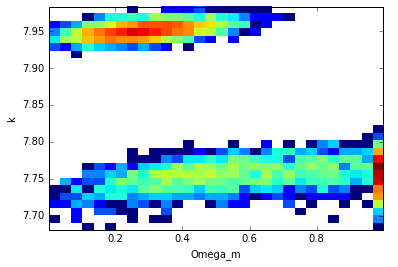

done


In [23]:
#Plot 2D hist of parameters
from ROOT import *
#gStyle.SetOptStat(11)
gStyle.SetOptStat(0)

setfit = 1
canvasContour = TCanvas("canvasContour","", 50, 50, 600, 400)

Hist_simFlat = TH2F("Hist_simFlat", ";\Omega_m;k", 30, 0, 1, 30, 7.68, 8) #xbins, xlow, xhigh, ybins, ylow, yhigh
Hist_simFree = TH2F("Hist_simFree", ";\Omega_m;\Omega_\Lambda", 30, 0, 1, 30, 0,1) #xbins, xlow, xhigh, ybins, ylow, yhigh


#Plot fit parameters. Contours from density

#Draw plots
if setfit == 1:
    parsimFlat = np.loadtxt('parsimFlat.txt') 
    parsimFlat2 = np.loadtxt('parsimFlat2.txt') 
    parsimFlat3 = np.loadtxt('parsimFlat3.txt') 
    parsimFlat4 = np.loadtxt('parsimFlat4.txt') 
    parsimFlat5 = np.loadtxt('parsimFlat5.txt')
    OmegamFlat      = np.append(np.append(np.append(parsimFlat[:,0],parsimFlat2[:,0]),np.append(parsimFlat3[:,0],parsimFlat4[:,0])),parsimFlat5[:,0])
    kFlat           = np.append(np.append(np.append(parsimFlat[:,1],parsimFlat2[:,1]),np.append(parsimFlat3[:,1],parsimFlat4[:,1])),parsimFlat5[:,1])

    for i in range(1000):
        Hist_simFlat.Fill(OmegamFlat[i],kFlat[i])
        #Hist_simFlat.Fill(parsimFlat2[i,0],parsimFlat2[i,1]) #Order is irrelevant
        #Hist_simFlat.Fill(parsimFlat3[i,0],parsimFlat3[i,1])
        #Hist_simFlat.Fill(parsimFlat4[i,0],parsimFlat4[i,1])
        #Hist_simFlat.Fill(parsimFlat5[i,0],parsimFlat5[i,1])

    Hist_simFlat.Draw('colz')
    plt.figure()
    %matplotlib inline
    counts,ybins,xbins,image = matplotlib.pyplot.hist2d(OmegamFlat,kFlat,bins=30,norm=matplotlib.colors.LogNorm())#
    matplotlib.pyplot.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
    plt.xlabel('Omega_m')
    plt.ylabel('k')
    plt.show()
    canvasContour.Update()
    canvasContour.Draw()
    canvasContour.SaveAs("Contour_sim_flat_original.png") #Contour from simulation

else:
    parsimFree = np.loadtxt('parsimFree.txt') 
    parsimFree2 = np.loadtxt('parsimFree2.txt')
    parsimFree3 = np.loadtxt('parsimFree3.txt')
    parsimFree4 = np.loadtxt('parsimFree4.txt')
    parsimFree5 = np.loadtxt('parsimFree5.txt')
    OmegamFree      = np.append(np.append(np.append(parsimFree[:,0],parsimFree2[:,0]),np.append(parsimFree3[:,0],parsimFree4[:,0])),parsimFree5[:,0])
    OmegaLambdaFree = np.append(np.append(np.append(parsimFree[:,2],parsimFree2[:,2]),np.append(parsimFree3[:,2],parsimFree4[:,2])),parsimFree5[:,2])
    for i in range(5000):
        Hist_simFree.Fill(OmegamFree[i],OmegaLambdaFree[i])
        #Hist_simFree.Fill(parsimFree2[i,0],parsimFree2[i,2])
        #Hist_simFree.Fill(parsimFree3[i,0],parsimFree3[i,2])
        #Hist_simFree.Fill(parsimFree4[i,0],parsimFree4[i,2])
        #Hist_simFree.Fill(parsimFree5[i,0],parsimFree5[i,2])
        #Hist_simFree.Fill(parsimFree2[i,0],parsimFree2[i,1],parsimFree2[i,2]) #Order is irrelevant

    Hist_simFree.Draw('colz')
    plt.figure()
    %matplotlib inline
    counts,ybins,xbins,image = matplotlib.pyplot.hist2d(OmegamFree,OmegaLambdaFree,bins=30,norm=matplotlib.colors.LogNorm())#
    matplotlib.pyplot.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
    plt.xlabel(' #Omega')# _{m}')
    plt.ylabel(' #Omega _{#Lambda}')
    plt.show()
    canvasContour.Update()
    canvasContour.Draw()
    canvasContour.SaveAs("Contour_sim_free_original.png") #Contour from simulation


#gStyle.SetOptStat(1110)
print "done"

In [16]:
print parsimFree[:,2:3]
print np.log10(simTauFMatrix[1,0:len(tau)])
print np.log10(simTauFMatrix[1,9])
if np.isnan(np.log10(simTauFMatrix[1,9])):
    print "hello"

[[ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.03871317]
 [ 0.999     ]
 [ 0.59504501]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.78716029]
 [ 0.999     ]
 [ 0.52261929]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.50715836]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.46248476]
 [ 0.999     ]
 [ 0.08395261]
 [ 0.999     ]
 [ 0.66211946]
 [ 0.999     ]
 [ 0.99899999]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.999     ]
 [ 0.93037137]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.95073111]
 [ 0.999     ]
 [ 0.57667871]
 [ 0.999     ]
 [ 0.89808747]
 [ 0.999     ]
 [ 0.80778916]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.00100002]
 [ 0.999     ]
 [ 0.001     ]
 [ 0.999     ]
 [ 0.15654979]
 [ 0.999  

start
p0:  0.249093111613
p1:  7.88525690204
p2:  0


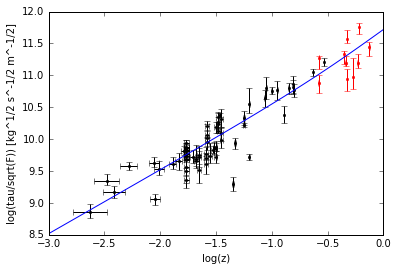

Prob: 4.75396508825e-91
done


In [24]:
# Matplotlib plot
# Remember to run the fit of real data, not the contour plot before this!
print "start"
plt.figure()
z_cosmo = np.linspace(0.0,0.8,100)

"""
DL      = cosmo.luminosity_distance(z_cosmo) #Fit with this somehow

%matplotlib inline
plt.plot(z_cosmo,DL.value) #Why does this one disappear?
plt.show()
"""

nr = 10

plt.figure()
%matplotlib inline
plt.errorbar(logz[dataB], logTauF[dataB], yerr=[dlogTauFm[dataB],dlogTauFp[dataB]], xerr=dlogz[dataB], linestyle='', fmt='.',markersize='5',color='k') #Remember m
plt.errorbar(logz[dataS[:nr]], logTauF[dataS[:nr]], yerr=[dlogTauFm[dataS[:nr]],dlogTauFp[dataS[:nr]]], xerr=dlogz[dataS[:nr]], linestyle='', fmt='.',markersize='5',color='r') #Remember m


logz_fit      = np.linspace(-3.0,0.0,100)

if setfit == 1:
    p0        = f_cosmo2.GetParameter(0)
    p1        = f_cosmo2.GetParameter(1)
    p2        = 0
    prob      = f_cosmo2.GetProb()
    #rms       = f_cosmo2.GetRMS()
    asdf = FlatLambdaCDM(H0=70, Om0=p0).luminosity_distance(10**logz_fit).value
    #p[2]+p[1]*math.log10(cosmo2.luminosity_distance(10**(x[0])).value)
else:
    p0        = f_cosmo.GetParameter(0)
    p1        = f_cosmo.GetParameter(1)
    p2        = f_cosmo.GetParameter(2)
    asdf = LambdaCDM(H0=70, Om0=p0, Ode0=p2).luminosity_distance(10**logz_fit).value
    prob      = f_cosmo.GetProb()
    #rms       = f_cosmo.GetRMS()
    
print "p0: ",p0
print "p1: ",p1
print "p2: ",p2
       
asdf = np.array(asdf)
logtauF_fit   = p1+np.log10(asdf)#*logz_fit #p0*logz_fit
plt.plot(logz_fit,logtauF_fit)
plt.xlabel('log(z)')
plt.ylabel('log(tau/sqrt(F)) [kg^1/2 s^-1/2 m^-1/2]')

plt.show()
print "Prob:", prob
#print "RMS:", rms
print "done"

In [43]:
### R vs. L plot ###
from ROOT import *
gStyle.SetOptStat(1111)   # Print for stat: Entries, Mean, and RMS
gStyle.SetOptFit(11111)    # Print for fit:  Everything!

logRBLR   = np.log10(RBLR)
dlogRBLRp = 0.434*dRBLRp/RBLR #np.log10(1+dRBLRp/RBLR)
dlogRBLRm = 0.434*dRBLRm/RBLR #np.log10(1+dRBLRm/RBLR)
logL      = np.log10(L) #Unneccesary now?

if olderrors==1:
    dlogRBLRp = np.log10(1+dRBLRp/RBLR)
    dlogRBLRm = np.log10(1+dRBLRm/RBLR)

#Graph_RL = TGraphErrors(len(L), L, RBLR, dL, dRBLR)
#Graph_RL = TGraphErrors(len(L), logL, logRBLR, logdL, dlogRBLR)

#Graph_RL = TGraph(len(L), L, logRBLR) #Use this for priors!

Graph_RL = TGraphAsymmErrors(len(L), L, logRBLR, dL, dL, dlogRBLRm,dlogRBLRp) #This for everything else
#Graph_tauFz = TGraphAsymmErrors(len(tau),logz,logTauF,dlogz,dlogz,dlogTauFm,dlogTauFp)

canvas2 = TCanvas("canvas2","", 50, 50, 600, 400)

#fitRL = TF1("fitRL", "[0]+[1]*x" , -10., 10.**(13))
fitRL = TF1("fitRL", "[0]+0.5*x" , -10., 10.**(13))

fitRL.SetParameter(0,-9)
fitRL.SetNpx(500) #good resolution

Graph_RL.Fit("fitRL", "R")

Graph_RL.GetXaxis().SetTitle("log(L) [W]") #/L_sol")
Graph_RL.GetYaxis().SetTitle("log(R_BLR) [m]")
Graph_RL.SetTitle("")

Graph_RL.SetLineColor(kBlack)
Graph_RL.SetMarkerSize(0.5)
Graph_RL.SetMarkerStyle(20)

fitRL.Draw("same")
Graph_RL.Draw('AP')
canvas2.Update()
canvas2.SaveAs("RL.png")
print "done"

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canvas2


done


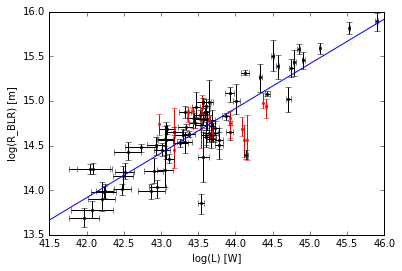

Prob: 1.0
RMS:

AttributeError: 'TF1' object has no attribute 'GetRMS'

In [16]:
# Matplotlib plot
plt.figure()

%matplotlib inline

plt.errorbar(L[dataB], logRBLR[dataB], yerr=[dlogRBLRm[dataB],dlogRBLRp[dataB]], xerr=dL[dataB], linestyle='', fmt='.',markersize='5',color='k') #Remember m
plt.errorbar(L[dataS], logRBLR[dataS], yerr=[dlogRBLRm[dataS],dlogRBLRp[dataS]], xerr=dL[dataS], linestyle='', fmt='.',markersize='5',color='r') #Remember m
p0RL           = fitRL.GetParameter(0)
p1RL           = fitRL.GetParameter(1)

L_fit        = np.linspace(41.5,46,100)
#logRBLR_fit  = p0 + p1*L_fit
logRBLR_fit  = p0RL + 0.5*L_fit
plt.plot(L_fit,logRBLR_fit)
plt.xlabel('log(L) [W]')
plt.ylabel('log(R_BLR) [m]')

plt.show()
print "Prob:", fitRL.GetProb()
#print "RMS:", fitRL.GetRMS()
print "done"

In [44]:
#RMS of RL

N=float(len(RBLR))
p0RL        = fitRL.GetParameter(0)
expectedR = np.array(p0RL + 0.5*L)
#diff=abs(expectedR   -   logRBLR) #yfit -y
diffy=np.array(abs(expectedR   -   logRBLR)) #yfit -y

#RMS=math.sqrt(1/(N-1.) * sum(diff**2))/math.sqrt(N) #y   sqrt(1/())

#Maybe also for x and then sqrt(RMSx^2+RMSy^2) ?
#I need to fix dz

expectedL = 2*(logRBLR - p0RL)
diffx=np.array(abs(expectedL   -   L)) #yfit -y

#RMS=np.sqrt(1/(N*(N-1.)) * np.sum(np.sqrt(np.add(diffx**2,diffy**2)))) #y
RMS_y = np.sqrt(1/(N-1.) * np.sum((diffy-np.mean(diffy))**2)) #y
RMS_x = np.sqrt(1/(N-1.) * np.sum((diffx-np.mean(diffx))**2)) #x
#RMS = math.sqrt(RMS_y**2+RMS_x**2) 
    
#1
sigp0    = f_cosmo.GetParError(0)
dlogRfit = np.sqrt(sigp0**2+0.25*dL**2)
dlogRBLR_mean =  (dlogRBLRm + dlogRBLRm)/2
dLfit    = 2*np.sqrt(dlogRBLR_mean**2+sigp0**2)

#2
ddiffy = np.sqrt(dlogRfit**2+dlogRBLR_mean**2)
ddiffx = np.sqrt(dLfit**2+dL**2)

#3
import decimal
decimal.getcontext().prec = 10

dist_points_on_fit = np.sqrt(np.add((diffx/ddiffx)**2,(diffy/ddiffy)**2)) #Distance between points on the fit.

diffxy = (diffx/ddiffx)*(diffy/ddiffy)/dist_points_on_fit   #math.sqrt(sigmaAway_y**2+sigmaAway_x**2)/2. #  /2 if linear
ddiffxy = np.array([0.]*len(diffx)) #Important that it is a float
for i in range(len(diffx)):
    test1 =                   ddiffy[i]**2. * (diffx[i]/math.sqrt(diffx[i]**2.+diffy[i]**2.)-diffx[i]*diffy[i]**2./float(diffx[i]**2.+diffy[i]**2.)**(3./2.))
    test2 =                                                                                                                                                     ddiffx[i]**2. * (diffy[i]/math.sqrt(diffx[i]**2.+diffy[i]**2.)-diffy[i]*diffx[i]**2./float(diffx[i]**2.+diffy[i]**2.)**(3./2.))
    test12  =(ddiffy[i]**2 * diffx[i]**6 + ddiffx[i]**2 * diffy[i]**6)/(diffx[i]**2 + diffy[i]**2)**3
    #ddiffxy[i] = decimal.Decimal(test1+test2).sqrt() #Why is this even worse?
    ddiffxy[i] = decimal.Decimal(test12).sqrt() #Why is this even worse?
    #print test1
    #print test2
    #print "ddiffxy[i]:",ddiffxy[i]
    #ddiffxy[i]=(math.sqrt(ddiffy[i]**2. * (diffx[i]/math.sqrt(diffx[i]**2.+diffy[i]**2.)-diffx[i]*diffy[i]**2./float(diffx[i]**2.+diffy[i]**2.)**(3./2.)) + ddiffx[i]**2. * (diffy[i]/math.sqrt(diffx[i]**2.+diffy[i]**2.)-diffy[i]*diffx[i]**2./float(diffx[i]**2.+diffy[i]**2.)**(3./2.))))
#test1 =                   ddiffy[i]**2. * (diffx[i]/math.sqrt(diffx[i]**2.+diffy[i]**2.)-diffx[i]*diffy[i]**2./float(diffx[i]**2.+diffy[i]**2.)**(3./2.))
#test2 =                                                                                                                                                     ddiffx[i]**2. * (diffy[i]/math.sqrt(diffx[i]**2.+diffy[i]**2.)-diffy[i]*diffx[i]**2./float(diffx[i]**2.+diffy[i]**2.)**(3./2.))
#print test1+test2
#print math.sqrt(test1+test2)
print "ddiffxy:",ddiffxy    
#wmean_diffxy =  np.sum(diffxy/ddiffxy**2)/np.sum(1/ddiffxy**2) #Weighted mean
wmean_diffxy =  np.sum(diffxy/ddiffxy)/np.sum(1/ddiffxy**2) #Weighted mean
print "wmean_diffxy:",wmean_diffxy
print np.mean(diffxy)

#diffxy=np.sqrt(np.add(diffx**2,diffy**2))
#RMS = np.sqrt(1/(N-1.) * np.sum((diffxy-np.mean(diffxy))**2)) #x
#RMS = np.sqrt(1/(N-2.) * np.sum((diffxy-wmean_diffxy)**2))#/ddiffxy**2)) 
chi2 = fitRL.GetChisquare()
print "chi2 from RL with no errors: ",chi2
RMS = np.sqrt(1/(N-2.) * chi2)#/ddiffxy**2)) #1 or 2??


#This does not take dtau into account

print diffxy-wmean_diffxy
#List of priors for all tau, R=c*tau -> tau=R/c
priormax = 10**expectedR *(1+np.log(10.)*2*RMS) /c#  R+dR = R*(1+ln(10)*RMS)      (10**(expectedR+2*RMS))/c #Expected R for that L + 2RMS -> tau prior
oldpriormax = (10**(expectedR+2*RMS))/c
oldpriormin = (10**(expectedR-2*RMS))/c
print "priormax",priormax
print "Old priormax",(10**(expectedR+2*RMS))/c
priormin = 10**expectedR *(1-np.log(10.)*2*RMS) /c#(10**(expectedR-2*RMS))/c
priors=np.vstack((oldpriormin,oldpriormax))
priors=priors/(24.*60*60) #s -> days

np.set_printoptions(suppress=True) #Print full number, not e+-something
print len(priors.T)
print "priors:", priors.T
#They depend on L as expected

print "priors Shen",priors[:,dataS].T*(1+np.array([z_S,z_S]).T)  #*(1+z) to read the plots
print "priors Bentz",priors[:,dataB].T

print (priormax[0]+priormin[0])/2.
print 10**(expectedR[0])/c #Errors are only symmetric in log-space
print "done"
print "y",dlogRBLR_mean
print "x",dL
print np.sort(dlogRBLR_mean/dL)
print np.median(np.sort(dlogRBLR_mean/dL))
print 1.90356097e-01
print RMS

ddiffxy: [ 0.03937437  0.12576203  0.04868094  0.05955182  0.12464693  0.13630703
  0.08474825  0.09682935  0.02702695  0.01002598  0.03157433  0.09806118
  0.16027718  0.04671176  0.14920968  0.05101337  0.02690621  0.07311748
  0.07695097  0.07310375  0.01602429  0.10969962  0.03290438  0.03021472
  0.04778561  0.03946372  0.04507731  0.07522144  0.08602609  0.08690417
  0.12024762  0.06470371  0.09299922  0.07980313  0.10583407  0.08836435
  0.12018321  0.07515707  0.08345017  0.11109226  0.0826805   0.11796038
  0.11732083  0.07341799  0.12931497  0.04373244  0.05513866  0.05956567
  0.06714907  0.04932894  0.09647485  0.04914843  0.03916673  0.04631784
  0.04188331  0.04939186  0.11746053  0.13819854  0.11061648  0.0957577
  0.09726391  0.10586102  0.07310986  0.04177553  0.09796685  0.12391626
  0.04605376  0.08813467  0.02405742  0.11443507  0.02796508  0.03931692
  0.06117695]
wmean_diffxy: 0.124579237764
1.65251809725
chi2 from RL with no errors:  369.529827861
[  2.03264496e+

In [92]:
# Peterson paper 1 data:
#Mrk 335: dataB[0:2]     8.53673838  66.27009279
#Mrk 590: dataB[6:10]    6.09694144  47.33012269
#Akn 120: dataB[12:14]    9.36184354  72.67532548
#Mrk 79: dataB[14:17]    7.31731373  56.80378595
#Mrk 110: dataB[18:21]   7.29056294  56.59612151
#Mrk 817: dataB[57:60]   7.63283275  59.25313771

Prange=dataB[57:60]
L_P = np.sum(L[Prange]/dL[Prange]**2)/np.sum(1/dL[Prange]**2)
dL_P = 1/np.sum(1/dL[Prange])
F_P   = np.sum(F[Prange]/dF[Prange]**2)/np.sum(1/dF[Prange]**2)
dF_P  = 1/np.sum(1/dF[Prange])

tau_P   = np.sum(tau[Prange]/dtaumean[Prange]**2)/np.sum(1/dtaumean[Prange]**2)/float(24*60*60) #np.mean(tau[Prange])/float(24*60*60)
dtau_P  = 1/np.sum(1/dtaumean[Prange]) /float(24*60*60) #np.mean(tau[Prange])/float(24*60*60)
#dtaup_P = #np.sum((dtaup[Prange])**2)/float(2*24*60*60) #np.mean(dtaup[Prange])/float(24*60*60)
#dtaum_P = #np.sum((dtaum[Prange])**2)/float(2*24*60*60)

expectedR_P = np.array(p0RL + 0.5*L_P) # P for Peterson
#diffy_P=np.array(abs(expectedR_P   -   logRBLR_P)) #yfit - y
#expectedL_P = 2*(logRBLR_P - p0RL)
#diffx_P=np.array(abs(expectedL_P   -   L_P)) #yfit - y

#RMS_P=np.sqrt(1/(N*(N-1.)) * np.sum(np.sqrt(np.add(diffx**2,diffy**2)))) #y

priormax_P=10**(expectedR_P+2*RMS)/c
priormin_P=10**(expectedR_P-2*RMS)/c
priors_P=np.vstack((priormin_P,priormax_P)).T/(24.*60*60)
print priors_P
print "Tau is between:", tau_P-dtau_P," and ",tau_P+dtau_P

print tau_P, "+", dtau_P, "-", dtau_P
print tau[Prange]/float(24*60*60)

# new tau * old sig/oldtau = new sig
print (38.97554169)*8.9/(tau_P)
print "F:", F_P, "+-", dF_P
print "L:", L_P, "+-", dL_P
print 15.2684050833-8.58850236

#print "\\bf{Mrk 335} & $16.8 ^{+ 4.8 }_{- 4.2 }$ & $6.12\pm0.19$ & $43.70\pm0.06$ & &"
for i in Prange:
    print "\\underline{",name[i],"} & $",tau[i]/(24*60*60.),"^{+",dtaup[i]/(24*60*60.),"}_{-",dtaum[i]/(24*60*60.),"}$ & ", int(round(F[i]*10**(10),0)),"$\pm$",int(round(dF[i]*10**(10),0))," & ", round(L[i],3),"$\pm$",round(dL[i],3)," & & \\\\" 
print "With prior & ",round(tau_P,1),"$\pm$",round(dtau_P,1)," & ", int(round(F_P*10**(10),0)),"$\pm$",int(round(dF_P*10**(10),0))," & ", round(L_P,3),"$\pm$",round(dL_P,3)," &",round(priormin_P/(24.*60*60),1)," & ",round(priormax_P/(24.*60*60),1),"\\\\" 


[[  7.63283275  59.25313771]]
Tau is between: 17.5849624299  and  20.5141651634
19.0495637967 + 1.46460136674 - 1.46460136674
[ 19.   15.3  33.6]
18.2094626808
F: 3.75536585332e-08 +- 5.45454544709e-10
L: 43.6500002543 +- 0.016666666915
6.6799027233
\underline{ Mrk817 } & $ 19.0 ^{+ 3.9 }_{- 3.7 }$ &  461 $\pm$ 20  &  43.73 $\pm$ 0.05  & & \\
\underline{ Mrk817 } & $ 15.3 ^{+ 3.7 }_{- 3.5 }$ &  351 $\pm$ 15  &  43.61 $\pm$ 0.05  & & \\
\underline{ Mrk817 } & $ 33.6 ^{+ 6.5 }_{- 7.6 }$ &  352 $\pm$ 15  &  43.61 $\pm$ 0.05  & & \\
With prior &  19.0 $\pm$ 1.5  &  376 $\pm$ 5  &  43.65 $\pm$ 0.017  & 7.6  &  59.3 \\


In [181]:
# Print priors for a measurement
nr = 51#69#23#35#39#51#54#62#69
"""
print "Some prior from Shen", priors[:,dataS[nr]].T*(1+np.array([z_S[nr],z_S[nr]]).T) #Bentz nr. x
print "Tau is between:", tau_S[nr]/float(24*60*60)*(1+z_S[nr])-dtaum_S[nr]/float(24*60*60)*(1+z_S[nr])," and ",tau_S[nr]/float(24*60*60)*(1+z_S[nr])+dtaup_S[nr]/float(24*60*60)*(1+z_S[nr])
print "tau_S*(1+z) from the paper", tau_S[nr]/float(24*60*60)*(1+z_S[nr]),"+",dtaup_S[nr]/float(24*60*60)*(1+z_S[nr]),"-",dtaum_S[nr]/float(24*60*60)*(1+z_S[nr])

#print 

print ""
print 0/(1.+z_S[nr])
print (13.5585100114-5.51406383)/(1.+z_S[nr])
print 0/(1.+z_S[nr])
print ""
#"""

print "Some prior from Bentz", priors[:,dataB[nr]].T #Bentz no. x
print "Tau is between:          ", tau_B2[nr]/float(24*60*60)-dtaum_B2[nr]/float(24*60*60)," and ",tau_B2[nr]/float(24*60*60)+dtaup_B2[nr]/float(24*60*60)
print "tau_B from the paper", tau_B2[nr]/float(24*60*60),"+",dtaup_B2[nr]/float(24*60*60),"-",dtaum_B2[nr]/float(24*60*60)
print ""
#print "Some prior from Bentz", priors[:,dataB[nr]].T*(1+np.array([z_B2[nr],z_B2[nr]]).T) #Bentz no. x
#print "tau_B from the paper", tau_B2[nr]/float(24*60*60)*(1+z_B2[nr]),"+",dtaup_B2[nr]/float(24*60*60)*(1+z_B2[nr]),"-",dtaum_B2[nr]/float(24*60*60)*(1+z_B2[nr])

# new tau * old sig/oldtau = new sig
print (35.2)*1.20/(tau_B2[nr]/float(24*60*60))
print (10**(expectedR[nr])/c - tau[nr])/tau[nr]
print 10**(expectedR[nr])/c/float(24*60*60)
print 40.1-25.8633729

Some prior from Bentz [  3.82547385  29.69688139]
Tau is between:           2.8  and  12.2
tau_B from the paper 6.5 + 5.7 - 3.7

6.49846153846
0.00787408536873
5.5937011738
14.2366271


In [47]:
# How large deviations should I expect
print N
# 86, so I expect 1 point to be a little over 2.5 sigma away
# I remove every point beyond 3 sigma


#Data to use: logz,logTauF,dlogz,dlogz,dlogTauFm,dlogTauFp

#Already defined:
p0        = f_cosmo2.GetParameter(0)
p1        = f_cosmo2.GetParameter(1)

#Project each point on fit in each direction

    ### I know logz, and project to find the expected logTauF ###
    
if setfit ==1:
    asdf = FlatLambdaCDM(H0=70, Om0=p0).luminosity_distance(10**logz).value
    #p[2]+p[1]*math.log10(cosmo2.luminosity_distance(10**(x[0])).value)
else:
    asdf = LambdaCDM(H0=70, Om0=p0, Ode0=p2).luminosity_distance(10**logz).value

asdf = np.array(asdf)
logtauF_fit_real_z   = p1+np.log10(asdf)# Fit values for each real z. expectedTauF = logtauF_fit_real_z
logtauF_fit_real_z = np.array(logtauF_fit_real_z) 

    ### I know logTauF, and project to find the expected logz ###

def diff_findz(x):   # Function to minimise. Find z
    #return abs( FlatLambdaCDM(H0=70, Om0=p0).luminosity_distance(10**x[0]).value - (logTauF[i] - p1) )    # np.log10(FLCMD(z))+p1 = logtauF =>  np.log10(FLCMD(z))+p1 - logtauF = 0  
    if setfit==1:
        return abs( np.log10(FlatLambdaCDM(H0=70, Om0=p0).luminosity_distance(10**x[0]).value) + p1 - logTauF[i])    # np.log10(FLCMD(z))+p1 = logtauF =>  np.log10(FLCMD(z))+p1 - logtauF = 0  
    else:
        return abs( np.log10(LambdaCDM(H0=70, Om0=p0, Ode0=p2).luminosity_distance(10**x[0]).value) + p1 - logTauF[i])    # np.log10(FLCMD(z))+p1 = logtauF =>  np.log10(FLCMD(z))+p1 - logtauF = 0  

errorMinimisationRel = np.array([0.0]*int(N)); #To check if the error is small enough
expectedz = np.array([0.0]*int(N));

verbose = False 
for i in range(len(logTauF)) : #range(3) :
    #expectedz = scipy.optimize.fmin_bfgs(diff_findz,[-3,0],disp=True) #  minimize? fmin_bfgs?    http://www.scipy-lectures.org/advanced/mathematical_optimization/
    #optim = scipy.optimize.fmin_bfgs(diff_findz,logz[i],disp=False) #  minimize? fmin_bfgs?    http://www.scipy-lectures.org/advanced/mathematical_optimization/
    optim = scipy.optimize.minimize(diff_findz,logz[i]) # Check around z_i.  minimize? fmin_bfgs?    http://www.scipy-lectures.org/advanced/mathematical_optimization/
    expectedz [i] = optim.x
    if setfit ==1:
        errorMinimisationRel[i] = abs( np.log10(FlatLambdaCDM(H0=70, Om0=p0).luminosity_distance(10**test).value) + p1 -logTauF[i])/logTauF[i] #Relative error
    else:
        errorMinimisationRel[i] = abs( np.log10(LambdaCDM(H0=70, Om0=p0, Ode0=p2).luminosity_distance(10**test).value) + p1 -logTauF[i])/logTauF[i] #Relative error

    
    if verbose == True:
        print "logz", logz[i]
        print "expected logz", expectedz

        print "optim.fun", optim.fun #What is this?
        
        if setfit ==1:
            print "function value (should be close to logTauF)", np.log10(FlatLambdaCDM(H0=70, Om0=p0).luminosity_distance(10**test).value) + p1
        else:
            print "function value (should be close to logTauF)", np.log10(LambdaCDM(H0=70, Om0=p0, Ode0=p2).luminosity_distance(10**test).value) + p1
        print "logTauF", logTauF[i]
        print "Relative error", errorMinimisationRel[i]
        print ""
    #print expectedz #Display results
    if i%7==0 :
        print round(i/float(len(logTauF))), "%"
print "Relative error", errorMinimisationRel #Relative error
print "expected logz", expectedz
print "logz", logz
print "done" 

86.0


TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'array.array'

In [90]:
# Find distance to points in sigma =sigmaAway

sigmaAway=np.array([0.0]*int(N));

"""
for i in range(len(logTauF)):
    findthis = logTauF - p1# f(Omega_m,z) = logTauF - p1
    expectedz[i] = z[i] #First guess
    while eps>0.1 : #Close
        diff_findz = FlatLambdaCDM(H0=70, Om0=p0).luminosity_distance(10**logz).value - findthis
        if diff_findz>0 :
"""            
        

diff_fit_x = logz - expectedz # expectedz = For a tauF, which z would I expect
diff_fit_y = logTauF - logtauF_fit_real_z  # expectedTauF = logtauF_fit_real_z


#diff_fit_real = np.sqrt(np.add(diff_fit_x**2,diff_fit_y**2)) #WRONG  Distance from points to fit

#diff_fit_real= logTauF - logtauF_fit_real_z #Not taking dz into account again!


for i in range(int(N)) : 
    if diff_fit_y[i]>0: #Which of the asym. sigma to use for sigmaAway
        sigmaAway_y = diff_fit_y[i]/float(dlogTauFm[i]) #Downwards
        #sigmaAway_y = diff_fit_real[i]/float(dlogTauFm[i]) #Downwards
    else:
        sigmaAway_y = -diff_fit_y[i]/float(dlogTauFp[i]) #Upwards
        
    sigmaAway_x = abs(diff_fit_x[i]/float(dlogz[i])) #dz is symmetric
    #Now, I look at the distance in sigma-space. I have coor to two points on the line.
    # (-sigmaAway,0) and (0,sigmaAway_y), find dist to (0,0)
    
    dist_points_sigmaspace = math.sqrt(sigmaAway_x**2+sigmaAway_y**2)#Distance between points on the fit.
    
    sigmaAway[i]= sigmaAway_x*sigmaAway_y/dist_points_sigmaspace   #math.sqrt(sigmaAway_y**2+sigmaAway_x**2)/2. #  /2 if linear
    print sigmaAway[i]
    print sigmaAway_x
    print sigmaAway_y
    print ""

print sigmaAway

print len(sigmaAway[sigmaAway>3])

i_data_used=sigmaAway<=3 #Indices of data close to the fit
print i_data_used
print "done"

1.25337277719
110.953650331
1.25345275494

0.152151600839
20.3084471544
0.152155871198

3.28874466047
171.841854033
3.2893471117

2.02150331505
299.398841772
2.02154939458

1.12769999189
77.1306100349
1.12782054179

1.24124857808
113.904420535
1.24132228424

2.50668565128
259.589532014
2.50680252737

2.31297206406
234.785671907
2.31308430973

2.6970197297
367.799209867
2.6970922431

1.65361176202
430.362580544
1.65362396895

2.43804567613
73.7869720298
2.43937763841

2.31318742704
112.895874153
2.31367314382

0.229588278074
7.0661170333
0.229709561516

1.89163654858
96.7116127318
1.89199850016

0.174505583491
37.7586114956
0.174507447177

1.47848545381
9.78238176413
1.49566656727

1.73435274375
19.6371864827
1.74115689015

8.07287531159
13.3439428941
10.1387788931

0.845935429791
22.9043979113
0.846512978307

0.564162991317
17.0791613763
0.564471030726

3.35413545896
27.6125502687
3.37915836129

0.211225929578
0.698370112053
0.221605142182

0.317855927683
4.25068293011
0.318748348192



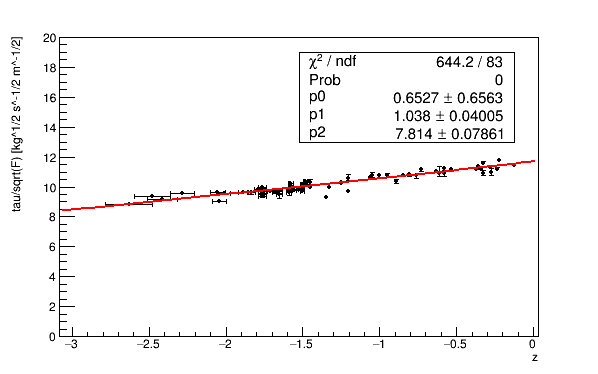

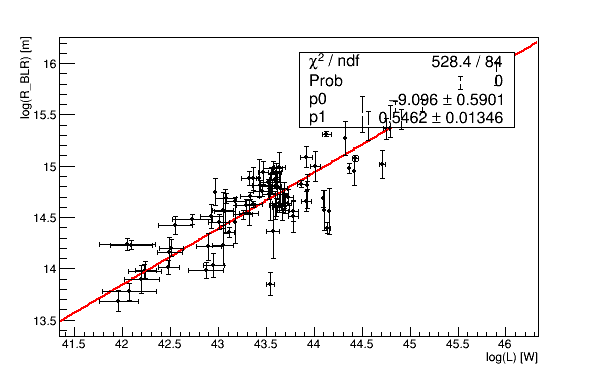

In [54]:
#Show plots

x = Image("tauFz.png") 
y = Image("RL.png") 
display(x,y)

In [66]:
#Print data in LaTeX format

#141214.20+532546.7 & $36.7^{+10.4}_{-4.8}$ & 0.4581 & 3.998$\pm$0.005 & 44.365 $\pm$ 0.001\\

#for i in range(len(dataS)):
#    print name[i]," & $",tau[i]/(24*60*60.),"^{+",dtaup[i]/(24*60*60.),"}_{-",dtaum[i]/(24*60*60.),"}$ & ", round(z[i],4)," & ", round(F[i]*10**(10),3),"$\pm$",round(dF[i]*10**(10),3)," & ", round(L[i],3),"$\pm$",round(dL[i],3),"\\\\" 
for i in dataB:
    print name[i]," & $",tau[i]/(24*60*60.),"^{+",dtaup[i]/(24*60*60.),"}_{-",dtaum[i]/(24*60*60.),"}$ & ", round(z[i],5)," & ", int(round(F[i]*10**(10))),"$\pm$",int(round(dF[i]*10**(10)))," & ", round(L[i],3),"$\pm$",round(dL[i],3),"\\\\" 



Mrk335  & $ 16.8 ^{+ 4.8 }_{- 4.2 }$ &  0.02579  &  612 $\pm$ 19  &  43.7 $\pm$ 0.06 \\
Mrk335  & $ 12.5 ^{+ 6.6 }_{- 5.5 }$ &  0.02579  &  725 $\pm$ 21  &  43.78 $\pm$ 0.05 \\
Mrk335  & $ 14.3 ^{+ 0.7 }_{- 0.7 }$ &  0.02579  &  584 $\pm$ 29  &  43.68 $\pm$ 0.06 \\
PG0026+129  & $ 111.0 ^{+ 24.1 }_{- 28.3 }$ &  0.142  &  231 $\pm$ 7  &  44.91 $\pm$ 0.02 \\
PG0052+251  & $ 89.8 ^{+ 24.5 }_{- 24.1 }$ &  0.155  &  139 $\pm$ 8  &  44.75 $\pm$ 0.03 \\
Fairall9  & $ 17.4 ^{+ 3.2 }_{- 4.3 }$ &  0.04702  &  295 $\pm$ 23  &  43.92 $\pm$ 0.05 \\
Mrk590  & $ 20.7 ^{+ 3.5 }_{- 2.7 }$ &  0.02639  &  393 $\pm$ 33  &  43.53 $\pm$ 0.07 \\
Mrk590  & $ 14.0 ^{+ 8.5 }_{- 8.8 }$ &  0.02639  &  137 $\pm$ 31  &  43.07 $\pm$ 0.11 \\
Mrk590  & $ 29.2 ^{+ 4.9 }_{- 5.0 }$ &  0.02639  &  240 $\pm$ 31  &  43.32 $\pm$ 0.08 \\
Mrk590  & $ 28.8 ^{+ 3.6 }_{- 4.2 }$ &  0.02639  &  446 $\pm$ 34  &  43.59 $\pm$ 0.06 \\
3C120  & $ 38.1 ^{+ 21.3 }_{- 15.3 }$ &  0.03301  &  368 $\pm$ 12  &  44.01 $\pm$ 0.05 \\
3C120  & $ 2

In [ ]:
test=np.array([1,2,3])
test=test.T
print np.vstack(test)
print np.vstack((test,test))
print test[:2]
print test
print test -2

In [57]:
z_S=np.array(z_S)
kage=i_data_used[:len(z_S)]
print kage
print z_S[kage]
#print z_S[i_data_used[:len(z_S)]]

[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True]
[ 0.45809999  0.4418      0.58719999  0.26280001  0.2647      0.60369998
  0.75099999  0.4738      0.53240001  0.5266      0.18709999  0.1725
  0.4253      0.2439    ]


In [73]:
zremoved=z[np.invert(i_data_used_priors)]
print range(0,len(z))
alldataaa=np.array(range(0,len(z)))
removedpoints=alldataaa[np.invert(i_data_used_priors)]
print removedpoints
print len(removedpoints)
for i in removedpoints:
    print name[i]," & $",tau[i]/(24*60*60.),"^{+",dtaup[i]/(24*60*60.),"}_{-",dtaum[i]/(24*60*60.),"}$ \\\\" 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
[16 22 23 24 28 30 31 33 34 35 72 73 74]
13
Mrk335  & $ 12.5 ^{+ 6.6 }_{- 5.5 }$ \\
Mrk590  & $ 14.0 ^{+ 8.5 }_{- 8.8 }$ \\
Mrk590  & $ 29.2 ^{+ 4.9 }_{- 5.0 }$ \\
Mrk590  & $ 28.8 ^{+ 3.6 }_{- 4.2 }$ \\
Ark120  & $ 37.1 ^{+ 4.8 }_{- 5.4 }$ \\
Mrk79  & $ 16.1 ^{+ 6.6 }_{- 6.6 }$ \\
Mrk79  & $ 16.0 ^{+ 6.4 }_{- 5.8 }$ \\
Mrk110  & $ 24.3 ^{+ 5.5 }_{- 8.3 }$ \\
Mrk110  & $ 20.4 ^{+ 10.5 }_{- 6.3 }$ \\
Mrk110  & $ 33.3 ^{+ 14.9 }_{- 10.0 }$ \\
Mrk817  & $ 19.0 ^{+ 3.9 }_{- 3.7 }$ \\
Mrk817  & $ 15.3 ^{+ 3.7 }_{- 3.5 }$ \\
Mrk817  & $ 33.6 ^{+ 6.5 }_{- 7.6 }$ \\


In [67]:
test= -0.44411294 #logz
print abs( np.log10(FlatLambdaCDM(H0=70, Om0=p0).luminosity_distance(10**test).value) + p1 )
print logTauF[0]

11.2002584048
11.2002584126


In [106]:
test= np.array([[1, 2],[3, 4],[5, 6]])
print test
print test*np.array([[1,1], [2,2], [3,3]])
print 1+np.array([z_S,z_S]).T

[[1 2]
 [3 4]
 [5 6]]
[[ 1  2]
 [ 6  8]
 [15 18]]
[[ 1.45809999  1.45809999]
 [ 1.4418      1.4418    ]
 [ 1.46959999  1.46959999]
 [ 1.58719999  1.58719999]
 [ 1.26280001  1.26280001]
 [ 1.2647      1.2647    ]
 [ 1.60369998  1.60369998]
 [ 1.75099999  1.75099999]
 [ 1.4738      1.4738    ]
 [ 1.53240001  1.53240001]
 [ 1.5266      1.5266    ]
 [ 1.18709999  1.18709999]
 [ 1.1725      1.1725    ]
 [ 1.4253      1.4253    ]
 [ 1.2439      1.2439    ]]
[ 0.45809999  0.4418      0.46959999  0.58719999  0.26280001  0.2647
  0.60369998  0.75099999  0.4738      0.53240001  0.5266      0.18709999
  0.1725      0.4253      0.2439    ]


In [239]:
print decimal.Decimal(test1+test2).sqrt()

0.08593131648582294794753341393977697706305629218658209083287851333015543105948509955457515552217500334303023785798768069910824071522234348400002046220761594473129397295357418200488670795399532564771562336381040046741333693002851828126436350149154522048650773436674967467633957410508762455324183767096532446407815398369728779524204196503919898310644221921853247463302968911503814409494947838792916194231947237250543858448221620628221799045276104860732468914835607348048075859339529516311210781592015370553628368638010817262710035839093255274049958676428526395182033675429881325704422226614508989622362859579580084481596547470279050629279038972159109806749207979608604023068289023740522087800502666273483224396002841222601334014925020239575112354426233547551080425960815593792286452389791747891623633014083704438686695365979219506913205233054647551824873548216794902038741343307555771753864119667704753557590077085191024204038324297749026182430603561591386709510589449137596916276323637394424823567898